# Configure font

In [1]:
# Configure Arial as the default font in all figures

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


arial_font_path = '/PATH/TO/ARIAL/FONT/arial.ttf'

fm.fontManager.addfont(arial_font_path)

plt.rcParams['font.family'] = 'Arial'

# Path to Zenodo files folder

In [1]:
path = 'PATH/TO/ZENODO/FILES/FOLDER'

# Figure S17

## Panel A

In [3]:
import pandas as pd

permi_variants = pd.read_csv(path+'Fig6/FYN_suppressor_fitness_replicates.txt', sep='\t')


In [4]:
from seaborn import kdeplot
import numpy as np

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

permi_variants_scaled = permi_variants.copy()

arbitraryWT='FLFFVIV'

fig, ax = plt.subplots()

my_kde = kdeplot(data=permi_variants.loc[permi_variants['fitness']<-0.5], x='fitness', ax=ax)

lines = my_kde.get_lines()
plt.close()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
    ax.axvline(x[np.argmax(y)], ls='--')

permi_variants_scaled['fitness']=normalize(list(permi_variants_scaled['fitness']),{'actual': {'lower': mode, 'upper': permi_variants_scaled.loc[permi_variants_scaled['Nham_aa']==0]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
permi_variants_scaled['fitness1_uncorr']=normalize(list(permi_variants_scaled['fitness1_uncorr']),{'actual': {'lower': mode, 'upper': permi_variants_scaled.loc[permi_variants_scaled['Nham_aa']==0]['fitness1_uncorr'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
permi_variants_scaled['fitness2_uncorr']=normalize(list(permi_variants_scaled['fitness2_uncorr']),{'actual': {'lower': mode, 'upper': permi_variants_scaled.loc[permi_variants_scaled['Nham_aa']==0]['fitness2_uncorr'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
permi_variants_scaled['fitness3_uncorr']=normalize(list(permi_variants_scaled['fitness3_uncorr']),{'actual': {'lower': mode, 'upper': permi_variants_scaled.loc[permi_variants_scaled['Nham_aa']==0]['fitness3_uncorr'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})


fig, ax = plt.subplots()

my_kde = kdeplot(data=permi_variants_scaled, x='fitness', ax=ax)

lines = my_kde.get_lines()

for line in lines:
    x, y = line.get_data()

plt.close()

In [5]:
WTs_bearing_natural_DTS_core_queries=pd.read_csv(path+'Fig6/Structural_homologs_carrying_detrimental_cores_in_FYN.txt',sep='\t')

permi_variants_scaled["other_natural_SH3s"] = pd.Series(dtype="object")
permi_variants_scaled["Pro_mutant"] = pd.Series(dtype="object")
for index, row in permi_variants_scaled.iterrows():
    if row.aa_seq in list(WTs_bearing_natural_DTS_core_queries['DSSP_boundaries']) or row.aa_seq in list(WTs_bearing_natural_DTS_core_queries['Pro_mutant_1']) or row.aa_seq in list(WTs_bearing_natural_DTS_core_queries['Pro_mutant_2']) or row.aa_seq in list(WTs_bearing_natural_DTS_core_queries['Pro_mutant_3']):
        permi_variants_scaled.at[index,'other_natural_SH3s']=True
        if row.aa_seq in list(WTs_bearing_natural_DTS_core_queries['DSSP_boundaries']):
            permi_variants_scaled.at[index,'Pro_mutant']=False
        else:
            permi_variants_scaled.at[index,'Pro_mutant']=True

other_natural_SH3s = permi_variants_scaled.loc[permi_variants_scaled['other_natural_SH3s']==True].copy()

In [6]:
import math

for index, row in WTs_bearing_natural_DTS_core_queries.iterrows():
    try:
        WTs_bearing_natural_DTS_core_queries.at[index,'query_seq_fitness']=other_natural_SH3s.loc[other_natural_SH3s['aa_seq']==row.DSSP_boundaries].iloc[0]['fitness']
        WTs_bearing_natural_DTS_core_queries.at[index,'query_seq_gr']=other_natural_SH3s.loc[other_natural_SH3s['aa_seq']==row.DSSP_boundaries].iloc[0]['growthrate']
    except IndexError:
        continue
    try:
        WTs_bearing_natural_DTS_core_queries.at[index,'Pro_mutant_1_fitness']=other_natural_SH3s.loc[other_natural_SH3s['aa_seq']==row.Pro_mutant_1].iloc[0]['fitness']
        WTs_bearing_natural_DTS_core_queries.at[index,'Pro_mutant_1_gr']=other_natural_SH3s.loc[other_natural_SH3s['aa_seq']==row.Pro_mutant_1].iloc[0]['growthrate']
    except IndexError:
        continue
    try:
        WTs_bearing_natural_DTS_core_queries.at[index,'Pro_mutant_2_fitness']=other_natural_SH3s.loc[other_natural_SH3s['aa_seq']==row.Pro_mutant_2].iloc[0]['fitness']
        WTs_bearing_natural_DTS_core_queries.at[index,'Pro_mutant_2_gr']=other_natural_SH3s.loc[other_natural_SH3s['aa_seq']==row.Pro_mutant_2].iloc[0]['growthrate']
    except IndexError:
        continue
    try:
        WTs_bearing_natural_DTS_core_queries.at[index,'Pro_mutant_3_fitness']=other_natural_SH3s.loc[other_natural_SH3s['aa_seq']==row.Pro_mutant_3].iloc[0]['fitness']
        WTs_bearing_natural_DTS_core_queries.at[index,'Pro_mutant_3_gr']=other_natural_SH3s.loc[other_natural_SH3s['aa_seq']==row.Pro_mutant_3].iloc[0]['growthrate']
    except IndexError:
        continue

for index, row in WTs_bearing_natural_DTS_core_queries.iterrows():
    grs = []
    fitnesses = []
    for i in range(1,4,1):
        if math.isnan(row['Pro_mutant_'+str(i)+'_gr']) == False:
            grs.append(row['Pro_mutant_'+str(i)+'_gr'])
            fitnesses.append(row['Pro_mutant_'+str(i)+'_fitness'])
    if len(grs) > 0:
        WTs_bearing_natural_DTS_core_queries.at[index,'mean_Pro_mutant_gr']=sum(grs)/len(grs)
        WTs_bearing_natural_DTS_core_queries.at[index,'mean_Pro_mutant_fitness']=sum(fitnesses)/len(fitnesses)

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)

    return newcmap

iterator_cmap = 10

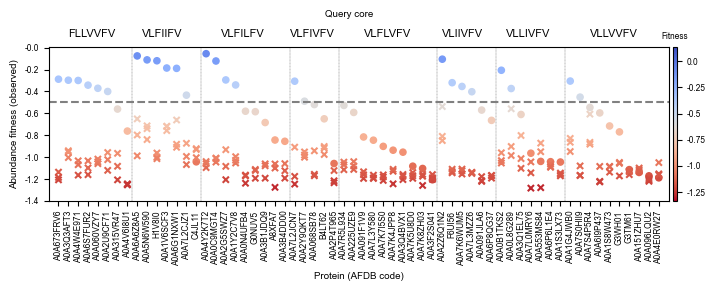

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

orig_cmap = plt.cm.coolwarm_r
fitness_values = permi_variants_scaled['fitness'].values
norm = plt.Normalize(vmin=np.min(fitness_values), vmax=np.max(fitness_values))

iterator_cmap += 1
midpoint = (-0.5 - np.min(fitness_values)) / (np.max(fitness_values) - np.min(fitness_values))
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=midpoint, name='shifted' + str(iterator_cmap))

plt.close('all')

filtered_df = WTs_bearing_natural_DTS_core_queries[
    WTs_bearing_natural_DTS_core_queries['fitness'].notnull() &
    WTs_bearing_natural_DTS_core_queries['mean_Pro_mutant_fitness'].notnull()
].copy()

filtered_df = filtered_df.sort_values(['MutCore', 'query_seq_fitness'], ascending=[True, False])

fig, ax = plt.subplots(figsize=(8, 2))

mut_cores = filtered_df['MutCore'].unique()
core_counts = filtered_df['MutCore'].value_counts()
position = 0
min_count = core_counts.min()

for i, natcore in enumerate(mut_cores):
    len_current = core_counts.loc[natcore]
    ax.text(position - 0.5 + (len_current - min_count) / 2, 0.1, natcore, fontsize=8)

    position += len_current
    if i < len(mut_cores) - 1:
        ax.axvline(position - 0.5, ls='--', color='k', lw=0.2)

fig.text(0.5, 1.03, 'Query core', ha='center', fontsize=7)

af_codes = filtered_df['AF_code']
query_seq_fitness = filtered_df['query_seq_fitness']
ax.scatter(
    af_codes,
    query_seq_fitness,
    c=shifted_cmap(norm(query_seq_fitness)),
    s=20
)

for pro_mutant in range(1, 4):
    pro_fitness = filtered_df[f'Pro_mutant_{pro_mutant}_fitness']
    ax.scatter(
        af_codes,
        pro_fitness,
        c=shifted_cmap(norm(pro_fitness)),
        marker='x',
        s=20
    )

ax.axhline(-0.5, color='gray', ls='--')

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=6)
ax.set_yticks(np.arange(-1.4, 0.1, 0.2))
ax.set_yticklabels([str(round(i, 1)) for i in np.arange(-1.4, 0.1, 0.2)], fontsize=6)
ax.set_xlabel('Protein (AFDB code)', fontsize=7)
ax.set_ylabel('Abundance fitness (observed)', fontsize=7)
ax.set_xlim(-1, len(filtered_df.index))

cax = fig.add_axes([0.905, 0.11, 0.005, 0.77])
sm = mpl.cm.ScalarMappable(cmap=orig_cmap, norm=norm)
cb = plt.colorbar(sm, cax=cax, orientation='vertical')

cax.set_yticks(np.arange(-1.25, 0.25, 0.25))
cax.set_yticklabels(np.arange(-1.25, 0.25, 0.25), fontsize=6)
cb.outline.set_visible(True)
cb.ax.set_title('Fitness', fontsize=6)

plt.rcParams['svg.fonttype'] = 'none'
# plt.savefig('Proteins_with_detrimental_cores_in_FYN_fitness.svg', dpi=300, transparent=False, bbox_inches='tight')
plt.show()
plt.close(fig)
